# Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from data_cleaner import get_dataset

In [64]:
# append all the jobs data
roles = ["Data Science", "Software Engineer"]
locations = ["San Francisco", "New York", "Toronto", "Vancouver"]
jobs_df = pd.DataFrame()
for role in roles:
    for location in locations:
        job_data = get_dataset('glassdoor_jobs_' + role.replace(" ","_") + '_' + \
                                                  location.replace(" ","_") + '.csv')
        job_data["Category"] = role
        jobs_df = pd.concat([jobs_df, job_data], ignore_index=True)
jobs_df.head()

,Job Title,Job Company,Job Location,Company Rating,Company Rating Numbers,Company Size,Company Founded,Company Type,Company Industry,Company Sector,Company Revenue,Level,Minimum,Maximum,Currency,Category,Company
0,Senior Data Scientist - Ads Optimization,Indeed,"San Francisco, CA",4.3,703,10000+ Employees,2004,Company - Private,Internet,Information Technology,$2 to $5 billion (USD),Senior,153000.0,223000.0,USD,Data Science,NaN
1,Technical Sourcer - Data Science & Analytics,Uber,"San Francisco, CA",4.0,3142,10000+ Employees,2009,Company - Public,Internet,Information Technology,$10+ billion (USD),Normal,87000.0,167000.0,USD,Data Science,NaN
2,Senior Data Science Analyst,JM Talent Inc.,"Oakland, CA",0.0,0,Unknown,0,Company - Public,Unknown,Unknown,Unknown / Non-Applicable,Senior,100000.0,100000.0,USD,Data Science,NaN
3,Data Science Lecturer,Excelon Associates,"Berkeley, CA",4.8,1,1 to 50 Employees,2007,Company - Private,Staffing & Outsourcing,Business Services,Less than $1 million (USD),Normal,62000.0,162000.0,USD,Data Science,NaN
4,Data Scientist,Warman O'Brien,"San Francisco, CA",5.0,0,1 to 50 Employees,2017,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),Normal,120000.0,140000.0,USD,Data Science,NaN


In [40]:
# Add Roles for each job:
def role(title, job_type):
    if job_type == "Software Engineer":
        if "test" in title.lower() or "qa" in title.lower() or "quality" in title.lower():
            return "Test"
        elif "backend" in title.lower():
            return "BackEnd"
        elif "frontend" in title.lower():
            return "FrontEnd"
        elif "full stack" in title.lower() or "developer" in title.lower():
            return "Full Stack"
        elif "infra" in title.lower() or "system" in title.lower() or "devops" in title.lower():
            return "Infra/System SWE"
        elif "cloud" in title.lower() or "data" in title.lower() or "analysis" in title.lower() \
        or "analytics" in title.lower():
            return "Data SWE"
        else:
            return "SWE"
    elif job_type == "Data Science":
        if "quantitative" in title.lower():
            if "analyst" in title.lower():
                return "Quantitative Analyst"
            elif "research" in title.lower():
                return "Quantitative Researcher"
            else:
                return "Quantitative Data"
        elif "machine learning" in title.lower() or "ML" in title:
            return "Machine Learning"
        elif "artificial intelligence" in title.lower() or "AI" in title:
            return "Artificial Intelligence"
        elif "engineer" in title.lower():
            return "Data Engineer"
        elif "research" in title.lower() or "deep learning" in title.lower():
            return "Data Researcher"
        elif "analyst" in title.lower() or "analysis" in title.lower() or "analytics" in title.lower():
            return "Data Analyst"
        elif "science" in title.lower() or "scientist" in title.lower():
            return "Data Science"
        else:
            return "General Data"
    else:
        return ""
    
jobs_df["Role"] = jobs_df.apply(lambda x: role(x['Job Title'], x['Category']), axis=1)
jobs_df

,Job Title,Job Company,Job Location,Company Rating,Company Rating Numbers,Company Size,Company Founded,Company Type,Company Industry,Company Sector,Company Revenue,Level,Minimum,Maximum,Currency,Category,Company,Role
0,Senior Data Scientist - Ads Optimization,Indeed,"San Francisco, CA",4.3,703,10000+ Employees,2004,Company - Private,Internet,Information Technology,$2 to $5 billion (USD),Senior,153000.0,223000.0,USD,Data Science,NaN,Data Science
1,Technical Sourcer - Data Science & Analytics,Uber,"San Francisco, CA",4.0,3142,10000+ Employees,2009,Company - Public,Internet,Information Technology,$10+ billion (USD),Normal,87000.0,167000.0,USD,Data Science,NaN,Data Analyst
2,Senior Data Science Analyst,JM Talent Inc.,"Oakland, CA",0.0,0,Unknown,0,Company - Public,Unknown,Unknown,Unknown / Non-Applicable,Senior,100000.0,100000.0,USD,Data Science,NaN,Data Analyst
3,Data Science Lecturer,Excelon Associates,"Berkeley, CA",4.8,1,1 to 50 Employees,2007,Company - Private,Staffing & Outsourcing,Business Services,Less than $1 million (USD),Normal,62000.0,162000.0,USD,Data Science,NaN,Data Science
4,Data Scientist,Warman O'Brien,"San Francisco, CA",5.0,0,1 to 50 Employees,2017,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),Normal,120000.0,140000.0,USD,Data Science,NaN,Data Science
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5656,Software Engineer - C#/.Net,Canalyst,Vancouver,3.3,8,51 to 200 Employees,0,Unknown,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,Normal,72000.0,100000.0,CA,Software Engineer,NaN,SWE
5657,DevOps Engineer,Prenuvo,Vancouver,5.0,4,1 to 50 Employees,0,Company - Private,Health Care Services & Hospitals,Health Care,Unknown / Non-Applicable,Normal,81000.0,117000.0,CA,Software Engineer,NaN,Infra/System SWE
5658,Software Engineer 1,WELL Health Technologies Corp,Vancouver,2.8,0,Unknown,0,Company - Private,Unknown,Unknown,Unknown / Non-Applicable,Normal,80000.0,119000.0,CA,Software Engineer,NaN,SWE
5659,Software Engineer / Full Stack Developer,MPM Engineering,Surrey,0.0,0,Unknown,0,Company - Private,Unknown,Unknown,Unknown / Non-Applicable,Normal,53000.0,89000.0,CA,Software Engineer,NaN,Full Stack


In [41]:
# display value histogram for for Role, Location, and Level
jobs_df.Role.value_counts()

SWE                        1779
Data Science               1190
Data Analyst                784
Full Stack                  652
Machine Learning            433
Data Engineer               235
BackEnd                     124
Data Researcher             123
FrontEnd                    115
Infra/System SWE             99
Artificial Intelligence      44
Data SWE                     42
Test                         21
General Data                 20
Name: Role, dtype: int64

In [42]:
jobs_df.Level.value_counts()

Normal    3852
Senior    1495
Junior     294
Intern      20
Name: Level, dtype: int64

In [43]:
jobs_df['Job Location'].value_counts()

San Francisco, CA       1695
New York, NY            1664
Vancouver                775
Toronto                  755
Mississauga              137
Langley                   58
Richmond                  52
Burnaby                   52
California                49
Brooklyn, NY              39
Surrey                    37
North Vancouver           36
Oakville                  33
Burlingame, CA            27
Brampton                  26
White Plains, NY          26
New York State            23
Richmond Hill             17
Berkeley, CA              17
Newark, NJ                16
Bronx, NY                 16
Martinez, CA              15
Staten Island, NY         14
Mississauga Valley        10
Long Island City, NY       7
Oakland, CA                7
Vaughan                    7
Markham                    5
Midtown Toronto            4
Menlo Park, CA             4
North York                 4
Etobicoke                  4
San Mateo, CA              3
Queens Village, NY         3
Alameda, CA   

<AxesSubplot:>

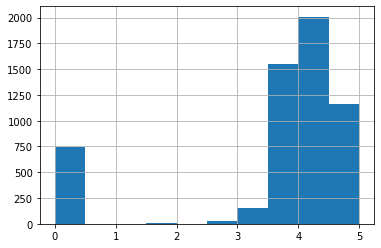

In [44]:
# Display histogram for company rating and year founded
jobs_df["Company Rating"].hist()

<AxesSubplot:>

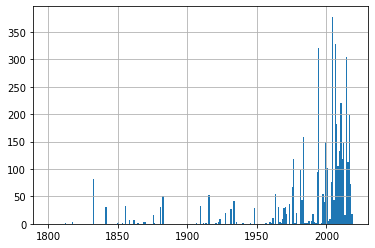

In [45]:
jobs_df["Company Founded"].hist(bins=range(1800, 2020)) # histogram beside founded in year 0
# can be seen that many companies were built in year 2000+

<AxesSubplot:>

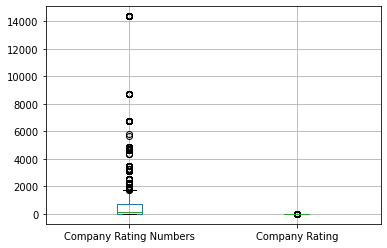

In [46]:
jobs_df.boxplot(column = ['Company Rating Numbers','Company Rating'])
# need normalization otherwise the rating nums will overtake rating value

<AxesSubplot:>

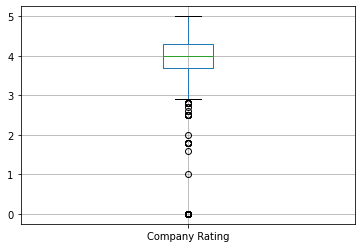

In [47]:
jobs_df.boxplot(column = ['Company Rating'])

In [48]:
jobs_df[['Minimum','Maximum','Company Rating']].corr()

,Minimum,Maximum,Company Rating
Minimum,1.000000,0.742045,0.208974
Maximum,0.742045,1.000000,0.278002
Company Rating,0.208974,0.278002,1.000000


In [50]:
# check correlation with given role by converting role to int
role_list = list(set(jobs_df['Role'].to_list()))
print(role_list)
role_index = jobs_df['Role'].apply(lambda x: role_list.index(x))
# correlation with roles
jobs_df[['Minimum','Maximum','Company Rating']].corrwith(role_index)
# Correlation might not accurate because the role_list is randomized

['Machine Learning', 'SWE', 'FrontEnd', 'Data Researcher', 'Full Stack', 'Artificial Intelligence', 'Data Analyst', 'BackEnd', 'Data SWE', 'Test', 'Data Science', 'Data Engineer', 'Infra/System SWE', 'General Data']


Minimum          -0.099101
Maximum          -0.171135
Company Rating    0.010382
dtype: float64

<AxesSubplot:>

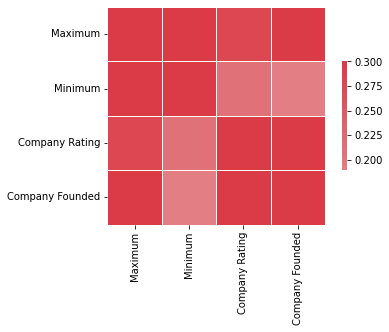

In [53]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(jobs_df[['Maximum','Minimum','Company Rating', 'Company Founded']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

graph for Company Size: total = 8


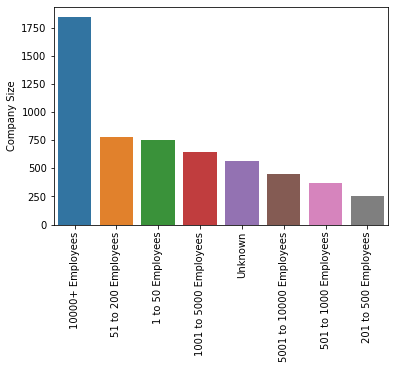

graph for Company Founded: total = 91


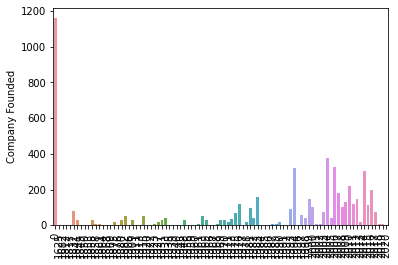

graph for Company Type: total = 11


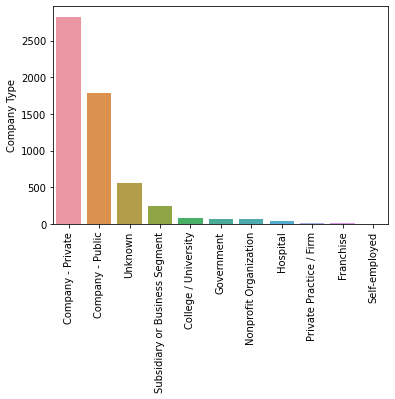

graph for Company Industry: total = 59


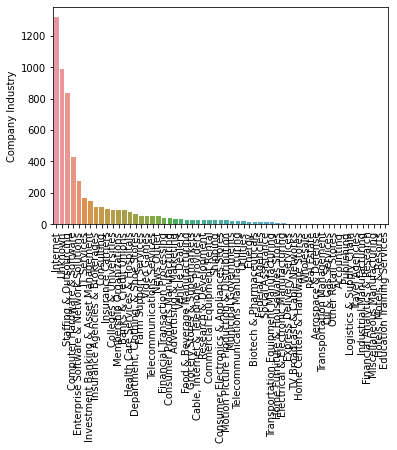

graph for Company Sector: total = 21


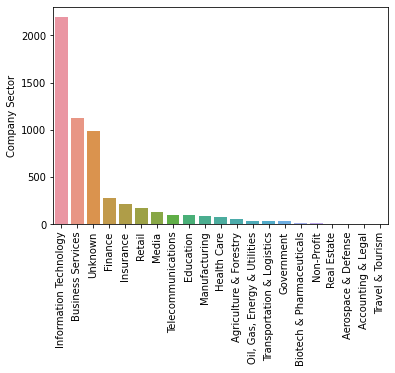

graph for Company Revenue: total = 14


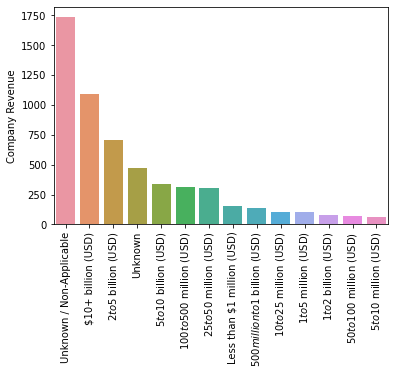

graph for Level: total = 4


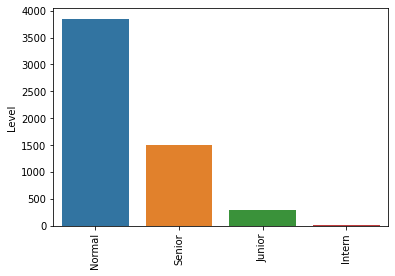

graph for Role: total = 14


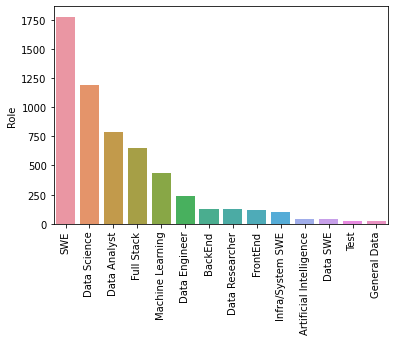

In [56]:
df_cat = jobs_df[['Company Size', 'Company Founded', 'Company Type', 'Company Industry', 'Company Sector', 'Company Revenue',
                 'Level', 'Role']]

for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [58]:
# Covert dataframe to csv
jobs_df.to_csv("EDA_data_result.csv")